In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.datasets import load_boston

In [54]:
boston = load_boston()

In [55]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [56]:
X = boston.data
y = boston.target

In [57]:
X.shape

(506, 13)

In [58]:
y = y.reshape(-1, 1)

In [59]:
y.shape

(506, 1)

### Pre-Processing Step

In [60]:
mu = X.mean(axis = 0)
mu

array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01])

In [61]:
sig = X.std(axis= 0)
sig

array([8.59304135e+00, 2.32993957e+01, 6.85357058e+00, 2.53742935e-01,
       1.15763115e-01, 7.01922514e-01, 2.81210326e+01, 2.10362836e+00,
       8.69865112e+00, 1.68370495e+02, 2.16280519e+00, 9.12046075e+01,
       7.13400164e+00])

In [62]:
X_new = (X - mu)/sig

In [63]:
X_new.mean(axis=0)

array([-8.78743718e-17, -6.34319123e-16, -2.68291099e-15,  4.70199198e-16,
        2.49032240e-15, -1.14523016e-14, -1.40785495e-15,  9.21090169e-16,
        5.44140929e-16, -8.86861950e-16, -9.20563581e-15,  8.16310129e-15,
       -3.37016317e-16])

In [64]:
X_new.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [65]:
X0 = np.ones((X_new.shape[0],1))

In [66]:
X0.shape

(506, 1)

In [67]:
X_new = np.hstack((X0, X_new))

In [68]:
X_new.shape

(506, 14)

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

In [75]:
X_train.shape

(404, 14)

In [76]:
y_train.shape

(404, 1)

In [77]:
X_test.shape

(102, 14)

## Multivariate Linear Regression

In [78]:
def hypothesis(X, theta):
    """
    X - (m,n)
    theta - (n,1)
    
    return - (m, 1)
    """
    
    return np.dot(X, theta)

#     y_hat = 0.0
#     m = X.shape[0]
#     for i in range(m):
#         y_hat += theta[i]*X[i]
        
#     return y_hat

In [98]:
def error(X, y, theta):
    """
    X - (m,n)
    y - (m,1)
    theta - (n,1)
    
    return - scalar
    """

    
    hypo = hypothesis(X, theta)
    err =  np.mean((hypo - y)**2)
    return err

In [106]:
def gradient(X, y, theta):
    """
    X - (m,n)
    y - (m,1)
    theta - (n,1)
    
    return - (n, 1)
    """
    
    hypo = hypothesis(X, theta)
    grad = (np.dot(X.T,(hypo - y)))
    return grad/X.shape[0]      

In [136]:
def gradient_descent(X, y, lr = 0.1, max_iter = 300):
    theta = np.zeros((X.shape[1], 1))
    
    error_list = []
    
    for _ in range(max_iter):
        e = error(X, y, theta)
        error_list.append(e)
        
        grad = gradient(X, y, theta)
        
        #Update Rule
        theta = theta - lr*grad
    
    return (theta, error_list)

In [137]:
theta, error_list = gradient_descent(X_train, y_train)

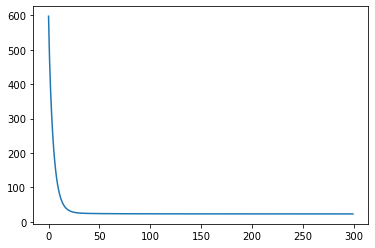

In [138]:
plt.plot(error_list)

In [143]:
y_pred = hypothesis(X_test, theta)

In [146]:
def r2_score(Y, Y_hat):
    """
    calculates the coeff of determination.
    """
    num = np.sum((Y_hat - Y)**2)
    denom = np.sum((Y.mean() - Y)**2)
    
    return np.round((1 - num/denom)*100, decimals=2)

In [148]:
# score on test data
r2_score(y_test, y_pred )

69.05

In [149]:
# score on train data
y_pred_train = hypothesis(X_train, theta)
r2_score(y_train, y_pred_train)

74.69

## from sklearn

In [150]:
from sklearn.linear_model import LinearRegression

In [151]:
lr = LinearRegression()

In [152]:
lr.fit(X_train, y_train)

LinearRegression()

In [153]:
lr.score(X_train, y_train)

0.7470845705280899

In [154]:
lr.score(X_test,y_test)

0.6909778638075431

In [ ]:
# closed form solution
# complete yourself
thetas = np.linalg.inv((np.dot(X.T, X)))